## EXERCISE 6.4 ##

# CONTENTS 
1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analy sis

# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

In [2]:
%matplotlib inline

# Create a path to main folder 

In [3]:
path =r'C:\Users\João Pedro\EXERCISES EXAMPLE PYTHON\World Happiness Report'

In [4]:
path

'C:\\Users\\João Pedro\\EXERCISES EXAMPLE PYTHON\\World Happiness Report'

In [5]:
df_report = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged_years.csv'), sep=';' , index_col = False)

In [6]:
df_report.head()

,Country,Year,Happiness_Rank,Happiness_Score,GDP_Capita,Family,Life_Expectancy,Freedom,Gov_Trust,Generosity,Region,Dystopia Residual,Standard Error,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low
0,Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,Western Europe,2.51738,0.03411,NaN,NaN,NaN,NaN
1,Iceland,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,Western Europe,2.70201,0.04884,NaN,NaN,NaN,NaN
2,Denmark,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Western Europe,2.49204,0.03328,NaN,NaN,NaN,NaN
3,Norway,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,Western Europe,2.46531,0.03880,NaN,NaN,NaN,NaN
4,Canada,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,North America,2.45176,0.03553,NaN,NaN,NaN,NaN


In [7]:
df_report.count()

Country                      782
Year                         782
Happiness_Rank               782
Happiness_Score              782
GDP_Capita                   782
Family                       782
Life_Expectancy              782
Freedom                      782
Gov_Trust                    781
Generosity                   782
Region                       315
Dystopia Residual            470
Standard Error               158
Lower Confidence Interval    157
Upper Confidence Interval    157
Whisker.high                 155
Whisker.low                  155
dtype: int64

In [8]:
df_report.shape

(782, 17)

In [9]:
df_report.columns

Index(['Country', 'Year', 'Happiness_Rank', 'Happiness_Score', 'GDP_Capita',
       'Family', 'Life_Expectancy', 'Freedom', 'Gov_Trust', 'Generosity',
       'Region', 'Dystopia Residual', 'Standard Error',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Whisker.high', 'Whisker.low'],
      dtype='object')

# 2. Data cleaning

# DROP THE UNNEEDED COLUMNS AND CREATE A DATA SUBSET

In [14]:
report_sub = df_report.drop([ 'Region','Standard Error', 'Lower Confidence Interval',
                             'Dystopia Residual','Upper Confidence Interval', 'Whisker.high', 'Whisker.low'], axis =1)

In [15]:
report_sub

,Country,Year,Happiness_Rank,Happiness_Score,GDP_Capita,Family,Life_Expectancy,Freedom,Gov_Trust,Generosity
0,Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,2019,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700
778,Tanzania,2019,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600
779,Afghanistan,2019,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800
780,Central African Republic,2019,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500


In [19]:
pd.option_context('mode.use_inf_as_na', True)

In [20]:
report_sub.isnull().sum()

Country            0
Year               0
Happiness_Rank     0
Happiness_Score    0
GDP_Capita         0
Family             0
Life_Expectancy    0
Freedom            0
Gov_Trust          1
Generosity         0
dtype: int64

In [21]:
report_sub.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
777    False
778    False
779    False
780    False
781    False
Length: 782, dtype: bool

# 3. Data prep for regression analysis

# Check for extreme values 

# Check extreme values from Happiness_Rank

C:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Happiness_Score', ylabel='Count'>

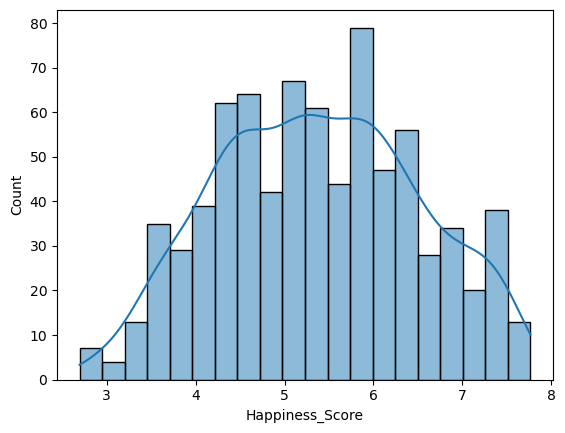

In [22]:
sns.histplot(report_sub['Happiness_Score'], bins=20, kde = True)

In [23]:
report_sub['Happiness_Score'].mean()

5.379017902998669

In [24]:
report_sub['Happiness_Score'].median()

5.322

In [25]:
report_sub['Happiness_Score'].max()

7.769

# 4. Regression analysis 

# Data prep for regression analysis

# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

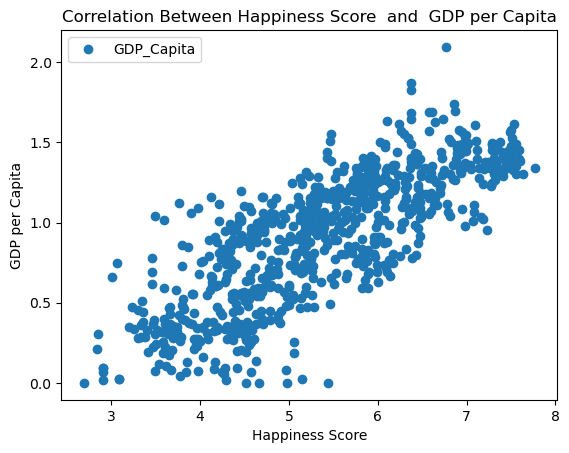

In [38]:
report_sub.plot(x = 'Happiness_Score', y='GDP_Capita',style='o') 
plt.title('Correlation Between Happiness Score  and  GDP per Capita')  
plt.xlabel('Happiness Score')  
plt.ylabel('GDP per Capita')  
plt.show()

## I want to check if higher the GDP per Capita higher the Happiness Score ##

# Reshape the variables into NumPy arrays and put them into separate objects.

In [31]:
x = report_sub['Happiness_Score'].values.reshape(-1,1)
y = report_sub['GDP_Capita'].values.reshape(-1,1)

In [32]:
x

array([[7.587     ],
       [7.561     ],
       [7.527     ],
       [7.522     ],
       [7.427     ],
       [7.406     ],
       [7.378     ],
       [7.364     ],
       [7.286     ],
       [7.284     ],
       [7.278     ],
       [7.226     ],
       [7.2       ],
       [7.187     ],
       [7.119     ],
       [6.983     ],
       [6.946     ],
       [6.94      ],
       [6.937     ],
       [6.901     ],
       [6.867     ],
       [6.853     ],
       [6.81      ],
       [6.798     ],
       [6.786     ],
       [6.75      ],
       [6.67      ],
       [6.611     ],
       [6.575     ],
       [6.574     ],
       [6.505     ],
       [6.485     ],
       [6.477     ],
       [6.455     ],
       [6.411     ],
       [6.329     ],
       [6.302     ],
       [6.298     ],
       [6.295     ],
       [6.269     ],
       [6.168     ],
       [6.13      ],
       [6.123     ],
       [6.003     ],
       [5.995     ],
       [5.987     ],
       [5.984     ],
       [5.975

In [33]:
y

array([[1.39651   ],
       [1.30232   ],
       [1.32548   ],
       [1.459     ],
       [1.32629   ],
       [1.29025   ],
       [1.32944   ],
       [1.33171   ],
       [1.25018   ],
       [1.33358   ],
       [1.22857   ],
       [0.95578   ],
       [1.33723   ],
       [1.02054   ],
       [1.39451   ],
       [0.98124   ],
       [1.56391   ],
       [1.33596   ],
       [1.30782   ],
       [1.42727   ],
       [1.26637   ],
       [1.36011   ],
       [1.04424   ],
       [1.52186   ],
       [1.06353   ],
       [1.32792   ],
       [1.10715   ],
       [1.69042   ],
       [1.27778   ],
       [1.05351   ],
       [1.17898   ],
       [1.06166   ],
       [0.91861   ],
       [0.9669    ],
       [1.39541   ],
       [1.23011   ],
       [1.2074    ],
       [1.29098   ],
       [1.55422   ],
       [0.99534   ],
       [1.21183   ],
       [0.76454   ],
       [0.74553   ],
       [0.63244   ],
       [1.16891   ],
       [1.27074   ],
       [1.24461   ],
       [0.864

# Split data into a training set and a test set.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create a regression object

In [35]:
regression = LinearRegression() 

# Fit the regression object onto the training set.

In [36]:
regression.fit(X_train, y_train)

LinearRegression()

# Predict the values of y using X.

In [37]:
y_predicted = regression.predict(X_test)

# Create a plot that shows the regression line from the model on the test set.

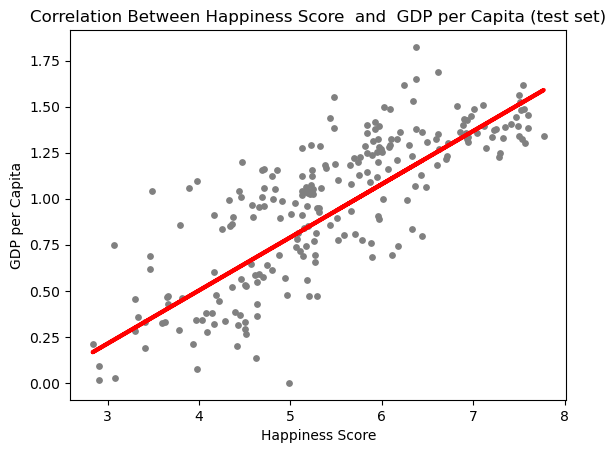

In [41]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Correlation Between Happiness Score  and  GDP per Capita (test set)')
plot_test.xlabel('Happiness Score')
plot_test.ylabel('GDP per Capita')
plot_test.show()

# Create objects that contain the model summary statistics.

In [42]:
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

# Print the model summary statistics. This is where you evaluate the performance of the model.

In [43]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.28868066]]
Mean squared error:  0.06317074515719913
R2 score:  0.6045532311224681


In [44]:
y_predicted

array([[0.94249581],
       [1.33539016],
       [1.17892521],
       [1.40265276],
       [0.43903672],
       [0.70202477],
       [0.61484324],
       [0.80854796],
       [1.34780343],
       [0.9318146 ],
       [1.21962922],
       [0.90323522],
       [0.30999647],
       [0.82702352],
       [0.18615246],
       [1.03198679],
       [0.55710713],
       [0.61080169],
       [0.73320231],
       [0.91507108],
       [1.18787435],
       [0.49504077],
       [0.70433424],
       [1.13706655],
       [1.25600298],
       [1.43411895],
       [1.0109131 ],
       [1.54150815],
       [0.40324034],
       [1.34607135],
       [1.18758567],
       [0.91507112],
       [1.03140943],
       [0.3319362 ],
       [1.4393152 ],
       [0.63389616],
       [0.23753762],
       [0.82673484],
       [1.10386831],
       [1.12811745],
       [0.64861888],
       [1.06922666],
       [1.12984953],
       [0.88678042],
       [1.46298701],
       [1.45086243],
       [0.97800351],
       [0.871

# Create a dataframe comparing the actual and predicted values of y.

In [45]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.101803,0.942496
1,1.398000,1.335390
2,1.530624,1.178925
3,1.394510,1.402653
4,0.285200,0.439037
5,1.156873,0.702025
6,0.385000,0.614843
7,0.740370,0.808548
8,1.425390,1.347803
9,1.186490,0.931815


# Compare how the regression fits the training set

# Predict.

In [46]:
y_predicted_train = regression.predict(X_train)

In [47]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [48]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.28868066]]
Mean squared error:  0.0625566955295173
R2 score:  0.6245244479606318


# Visualizing the training set results.

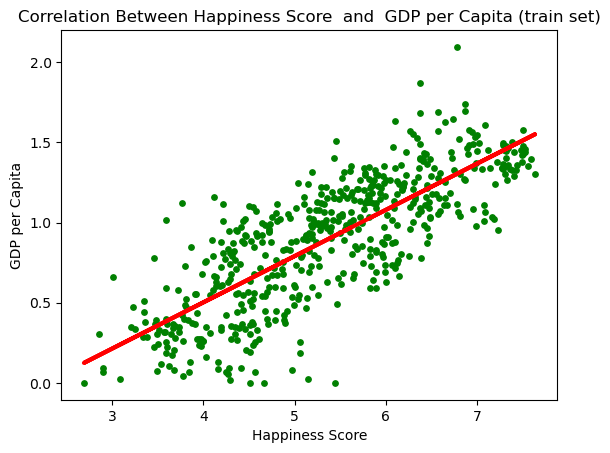

In [49]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Correlation Between Happiness Score  and  GDP per Capita (train set)')
plot_test.xlabel('Happiness Score')
plot_test.ylabel('GDP per Capita')
plot_test.show()